# Anime Recommendation 

![title](Assets/Wallpaper.jpg)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import json
import numpy as np
warnings.filterwarnings('ignore')
sns.set_theme(style = 'darkgrid')

In [4]:
with open('CONFIG.json') as f:
    config = json.load(f)
config

{'train_data_path': 'data/raw/anime.csv',
 'test_data_path': 'data/raw/test.csv',
 'train_processed_path': 'data/processed/train_processed.csv',
 'test_processed_path': 'data/processed/test_processed.csv',
 'sqlite_db_path': 'Anime-rec.sqlite'}

In [5]:
data = pd.read_csv(config['train_data_path'])
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
data.shape

(12294, 7)

In [7]:
data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [9]:
data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [10]:
data.loc[data.episodes == 'Unknown']

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400
...,...,...,...,...,...,...,...
12265,34361,Kyonyuu Reijou MC Gakuen,Hentai,OVA,Unknown,NaN,205
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [11]:
data.dropna(inplace = True, axis = 0)

In [12]:
data.sort_values(by = 'rating', ascending=False)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
...,...,...,...,...,...,...,...
8056,413,Hametsu no Mars,"Horror, Sci-Fi",OVA,1,2.37,27557
8057,13405,Utsu Musume Sayuri,"Comedy, Dementia",OVA,1,2.14,4047
8058,3287,Tenkuu Danzai Skelter+Heaven,"Mecha, Sci-Fi",OVA,1,2.00,7680
12258,20007,Hi Gekiga Ukiyoe Senya Ichiya,"Action, Hentai",Movie,1,1.92,129


In [13]:
data = data.loc[~(data.episodes == 'Unknown')]

In [14]:
data.episodes = data.episodes.astype('int')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11830 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11830 non-null  int64  
 1   name      11830 non-null  object 
 2   genre     11830 non-null  object 
 3   type      11830 non-null  object 
 4   episodes  11830 non-null  int32  
 5   rating    11830 non-null  float64
 6   members   11830 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 693.2+ KB


<AxesSubplot:xlabel='rating', ylabel='Density'>

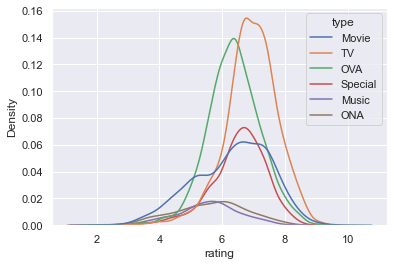

In [16]:
sns.kdeplot(data['rating'], hue = data['type'])

<AxesSubplot:xlabel='type', ylabel='count'>

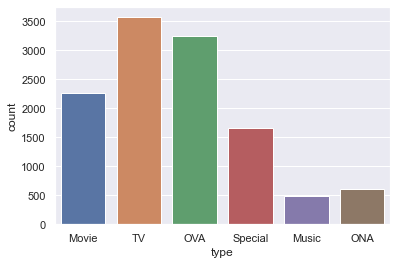

In [17]:
sns.countplot(data['type'])

<AxesSubplot:xlabel='episodes', ylabel='rating'>

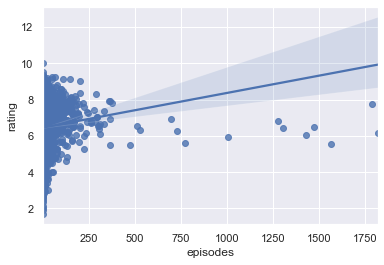

In [18]:
sns.regplot(y = data['rating'], x = data['episodes'])

<AxesSubplot:>

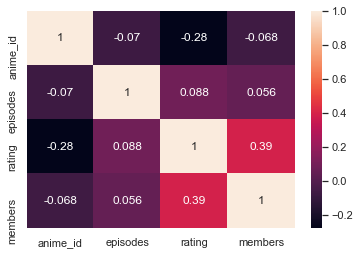

In [19]:
sns.heatmap(data.corr(),  annot = True)

<AxesSubplot:xlabel='members', ylabel='rating'>

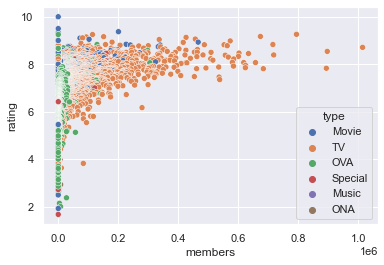

In [20]:
sns.scatterplot(y = data.rating, x = data.members, hue = data.type)

In [21]:
def get_genre_list(series):
    all_genres = []
    for i in series:
        genres = i.split(',')
        [all_genres.append(j.strip()) for j in genres]
    
    return pd.Series(all_genres)

genres = get_genre_list(data['genre']) 

In [22]:
genres.value_counts(ascending=False)

Comedy           4483
Action           2748
Adventure        2293
Fantasy          2219
Sci-Fi           2028
Drama            1972
Shounen          1669
Kids             1550
Romance          1436
Slice of Life    1180
School           1164
Hentai           1099
Supernatural      993
Mecha             927
Music             832
Historical        787
Magic             742
Ecchi             627
Shoujo            587
Seinen            530
Sports            527
Mystery           482
Super Power       445
Military          415
Parody            397
Space             376
Horror            360
Harem             312
Demons            287
Martial Arts      258
Dementia          238
Psychological     226
Police            194
Game              170
Samurai           145
Vampire           100
Thriller           86
Cars               71
Shounen Ai         62
Shoujo Ai          54
Josei              52
Yuri               41
Yaoi               37
dtype: int64

In [23]:
for i in genres.unique():
    data[str(i).strip()] = 0

In [24]:
data.head()

,anime_id,name,genre,type,episodes,rating,members,Drama,Romance,School,...,Shounen Ai,Game,Dementia,Harem,Cars,Kids,Shoujo Ai,Hentai,Yaoi,Yuri
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            12283, 12284, 12286, 12287, 12288, 12289, 12290, 12291, 12292,
            12293],
           dtype='int64', length=11830)

In [26]:
data1 = data.copy()

In [27]:
data.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'Drama', 'Romance', 'School', 'Supernatural', 'Action', 'Adventure',
       'Fantasy', 'Magic', 'Military', 'Shounen', 'Comedy', 'Historical',
       'Parody', 'Samurai', 'Sci-Fi', 'Thriller', 'Sports', 'Super Power',
       'Space', 'Slice of Life', 'Mecha', 'Music', 'Mystery', 'Seinen',
       'Martial Arts', 'Vampire', 'Shoujo', 'Horror', 'Police',
       'Psychological', 'Demons', 'Ecchi', 'Josei', 'Shounen Ai', 'Game',
       'Dementia', 'Harem', 'Cars', 'Kids', 'Shoujo Ai', 'Hentai', 'Yaoi',
       'Yuri'],
      dtype='object')

In [28]:
for i in data.index:

    genres = data1.genre[i].split(',')
    for j in genres:
        data1[j.strip()][i] = 1




In [29]:
data1.isnull().sum()

anime_id         0
name             0
genre            0
type             0
episodes         0
rating           0
members          0
Drama            0
Romance          0
School           0
Supernatural     0
Action           0
Adventure        0
Fantasy          0
Magic            0
Military         0
Shounen          0
Comedy           0
Historical       0
Parody           0
Samurai          0
Sci-Fi           0
Thriller         0
Sports           0
Super Power      0
Space            0
Slice of Life    0
Mecha            0
Music            0
Mystery          0
Seinen           0
Martial Arts     0
Vampire          0
Shoujo           0
Horror           0
Police           0
Psychological    0
Demons           0
Ecchi            0
Josei            0
Shounen Ai       0
Game             0
Dementia         0
Harem            0
Cars             0
Kids             0
Shoujo Ai        0
Hentai           0
Yaoi             0
Yuri             0
dtype: int64

In [30]:
data1.shape

(11830, 50)

In [31]:
dummies = pd.get_dummies(data.type, drop_first = True)
data2 = pd.concat([data1, dummies], axis = 'columns')
data2.head(25)

,anime_id,name,genre,type,episodes,rating,members,Drama,Romance,School,...,Kids,Shoujo Ai,Hentai,Yaoi,Yuri,Music,ONA,OVA,Special,TV
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,1,0,1,...,0,0,0,0,0,0,0,0,0,1
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
data2.drop(columns = ['anime_id', 'name', 'genre', 'episodes', 'type'], axis = 'columns', inplace = True)
data2.head()

,rating,members,Drama,Romance,School,Supernatural,Action,Adventure,Fantasy,Magic,...,Kids,Shoujo Ai,Hentai,Yaoi,Yuri,Music,ONA,OVA,Special,TV
0,9.37,200630,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.26,793665,1,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,9.25,114262,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9.17,673572,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9.16,151266,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
data2.columns

Index(['rating', 'members', 'Drama', 'Romance', 'School', 'Supernatural',
       'Action', 'Adventure', 'Fantasy', 'Magic', 'Military', 'Shounen',
       'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Thriller',
       'Sports', 'Super Power', 'Space', 'Slice of Life', 'Mecha', 'Music',
       'Mystery', 'Seinen', 'Martial Arts', 'Vampire', 'Shoujo', 'Horror',
       'Police', 'Psychological', 'Demons', 'Ecchi', 'Josei', 'Shounen Ai',
       'Game', 'Dementia', 'Harem', 'Cars', 'Kids', 'Shoujo Ai', 'Hentai',
       'Yaoi', 'Yuri', 'Music', 'ONA', 'OVA', 'Special', 'TV'],
      dtype='object')

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data2)

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(scaled)
similarity = pd.DataFrame(similarity, columns = data.name)

In [36]:
similarity = similarity.set_index(data.name)

In [37]:
similarity.head()

name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Silent Chaser Kagami,Super Erotic Anime,Teleclub no Himitsu,Tenshi no Habataki Jun,The Satisfaction,Toushindai My Lover: Minami tai Mecha-Minami,Under World,Violence Gekiga David no Hoshi,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Yasuji no Pornorama: Yacchimae!!
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,1.000000,0.293792,0.131272,0.211270,0.130926,0.493217,0.168414,0.345506,0.135737,0.128192,...,0.112087,0.095979,0.103129,0.092047,0.093360,0.086093,0.090397,0.109868,0.113041,0.173060
Fullmetal Alchemist: Brotherhood,0.293792,1.000000,0.428738,0.369350,0.431031,0.484950,0.684728,0.388493,0.334246,0.425142,...,0.079549,0.068120,0.073198,0.065341,0.066268,0.061117,0.064168,0.077989,0.080235,0.122825
Gintama°,0.131272,0.428738,1.000000,0.472044,0.999918,0.493109,0.531255,0.254313,0.941628,0.999926,...,0.082091,0.070293,0.075530,0.067412,0.068374,0.063051,0.066204,0.080464,0.082788,0.126746
Steins;Gate,0.211270,0.369350,0.472044,1.000000,0.474680,0.347326,0.413608,0.373813,0.321329,0.467000,...,0.117139,0.100309,0.107785,0.096212,0.097579,0.089993,0.094486,0.114837,0.118146,0.180863
Gintama&#039;,0.130926,0.431031,0.999918,0.474680,1.000000,0.492570,0.532334,0.253514,0.941314,0.999728,...,0.081163,0.069499,0.074676,0.066651,0.067602,0.062339,0.065456,0.079555,0.081853,0.125313


In [38]:
anime_list = data1.name.values

In [39]:
similarity.loc['Another'].sort_values(ascending = False)

name
Another                               1.000000
Kagewani                              0.901310
Kagewani: Shou                        0.900627
Higurashi no Naku Koro ni             0.850333
Gakkou no Kaidan                      0.820227
                                        ...   
Roboteuwang Sseonsyakeu               0.016194
Utsu Musume Sayuri                    0.009748
Tenkuu Danzai Skelter+Heaven          0.007401
Hi Gekiga Ukiyoe Senya Ichiya         0.006067
Platonic Chain: Ansatsu Jikkouchuu    0.000004
Name: Another, Length: 11830, dtype: float64

In [40]:
def get_recommendations(anime_name, similarity_matix = similarity, no = 5):
    anime_row = similarity.loc[anime_name]

    anime_row = anime_row.sort_values(ascending = False)
    recommendations = anime_row[1:no+1]
    return recommendations

In [41]:
get_recommendations('Death Note', similarity_matix = similarity)

name
Higurashi no Naku Koro ni Kai    0.889512
Mousou Dairinin                  0.884717
Higurashi no Naku Koro ni        0.834377
Death Note Rewrite               0.803384
Mirai Nikki (TV)                 0.801112
Name: Death Note, dtype: float64

In [43]:
top_recommendations = {}
for i in similarity.columns:
    try:
        top_recommendations[i] = get_recommendations(i, similarity_matix = similarity).index.values
    except:
        print('Error')

        


Error
Error
Error
Error


In [44]:
top_recommendations

{'Kimi no Na wa.': array(['Aura: Maryuuin Kouga Saigo no Tatakai',
        'Kokoro ga Sakebitagatterunda.', 'Wind: A Breath of Heart OVA',
        'Wind: A Breath of Heart (TV)', 'Harmonie'], dtype=object),
 'Fullmetal Alchemist: Brotherhood': array(['Fullmetal Alchemist', 'Magi: The Labyrinth of Magic',
        'Magi: The Kingdom of Magic', 'Densetsu no Yuusha no Densetsu',
        'Fullmetal Alchemist: The Sacred Star of Milos'], dtype=object),
 'Gintama°': array(['Gintama&#039;: Enchousen', 'Gintama&#039;', 'Gintama',
        'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare',
        'Gintama Movie: Shinyaku Benizakura-hen'], dtype=object),
 'Steins;Gate': array(['Steins;Gate Movie: Fuka Ryouiki no Déjà vu', 'Fireball Charming',
        'Hoshi no Ko Poron', 'Yuusei Kamen', 'RoboDz'], dtype=object),
 'Gintama&#039;': array(['Gintama°', 'Gintama&#039;: Enchousen', 'Gintama',
        'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare',
        'Gintama Movie: Shinyaku Benizakura-

In [45]:
len(top_recommendations)

11826

In [46]:
rec_table = pd.DataFrame(top_recommendations.values(), columns = [ '1', '2', '3', '4', '5'], index = top_recommendations.keys())


        

In [47]:
rec_table.head()

,1,2,3,4,5
Kimi no Na wa.,Aura: Maryuuin Kouga Saigo no Tatakai,Kokoro ga Sakebitagatterunda.,Wind: A Breath of Heart OVA,Wind: A Breath of Heart (TV),Harmonie
Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist,Magi: The Labyrinth of Magic,Magi: The Kingdom of Magic,Densetsu no Yuusha no Densetsu,Fullmetal Alchemist: The Sacred Star of Milos
Gintama°,Gintama&#039;: Enchousen,Gintama&#039;,Gintama,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Gintama Movie: Shinyaku Benizakura-hen
Steins;Gate,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,Fireball Charming,Hoshi no Ko Poron,Yuusei Kamen,RoboDz
Gintama&#039;,Gintama°,Gintama&#039;: Enchousen,Gintama,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Gintama Movie: Shinyaku Benizakura-hen


In [48]:
rec_table.shape

(11826, 5)

In [1]:
import sqlite3

conn = sqlite3.connect('Anime-Rec.sqlite')
cur = conn.cursor()

In [2]:
cur.execute('SELECT * FROM ANIME JOIN Recommendations ON ANIME.Anime_id = Recommendations.Anime_id;').fetchall()

[(1, 'Kimi no Na wa.', 'Movie', 9.37, 1, 1, 1107, 208, 5770, 6353, 1488),
 (2,
  'Fullmetal Alchemist: Brotherhood',
  'TV',
  9.26,
  2,
  2,
  200,
  267,
  101,
  793,
  1552),
 (3, 'Gintama°', 'TV', 9.25, 3, 3, 10, 5, 13, 9, 66),
 (4, 'Steins;Gate', 'TV', 9.17, 4, 4, 60, 3558, 8802, 10654, 9903),
 (5, 'Gintama&#039;', 'TV', 9.16, 5, 5, 3, 10, 13, 9, 66),
 (6,
  'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
  'TV',
  9.15,
  6,
  6,
  79,
  15,
  44,
  33,
  45),
 (7, 'Hunter x Hunter (2011)', 'TV', 9.13, 7, 7, 112, 9520, 1790, 3734, 4498),
 (8, 'Ginga Eiyuu Densetsu', 'OVA', 9.11, 8, 8, 412, 92, 1420, 3257, 3349),
 (9,
  'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare',
  'Movie',
  9.1,
  9,
  9,
  66,
  64,
  3,
  10,
  5),
 (10, 'Gintama&#039;: Enchousen', 'TV', 9.11, 10, 10, 3, 5, 13, 9, 66),
 (11, 'Clannad: After Story', 'TV', 9.06, 11, 11, 336, 1610, 2048, 2393, 142),
 (12, 'Koe no Katachi', 'Movie', 9.05, 12, 12, 8362, 5664, 623, 849, 2180),
 (13, 'Gintam

In [6]:
_id = get_id('Death Note', cur)
rec_list = cur.execute('SELECT * FROM Recommendations WHERE Anime_id = (?)', (_id, )).fetchall()[0]

def get_name_frm_id(id_list, cursor):
    names = []
    for i in id_list:
        names.append(cursor.execute('SELECT Anime_Name FROM ANIME WHERE Anime_id = (?)', (i, )).fetchall()[0][0])
    return names
    
    
    
get_name_frm_id(rec_list, cur)
    

['Death Note',
 'Death Note',
 'Higurashi no Naku Koro ni Kai',
 'Mousou Dairinin',
 'Higurashi no Naku Koro ni',
 'Death Note Rewrite',
 'Mirai Nikki (TV)']

In [4]:
def get_id(name, cursor):
    _id = cursor.execute('SELECT Anime_id FROM ANIME WHERE Anime_Name == (?)',(name, )).fetchall()[0][0]
    return _id
    
    

In [50]:
import sqlite3

conn = sqlite3.connect('Anime-Rec.sqlite')
cur = conn.cursor()
cur.executescript(
    '''
    DROP TABLE IF EXISTS ANIME;
    CREATE TABLE ANIME(
    Anime_id INTEGER PRIMARY KEY AUTOINCREMENT, 
    Anime_Name TEXT UNIQUE, 
    Type TEXT, 
    Rating  NUMERIC
    );
    
    '''

)

In [51]:
for i in rec_table.index:
    name = i
    _type = data.loc[data.name == name, 'type'].values[0]
    rating = data.loc[data.name == name, 'rating'].values[0]
    cur.execute('''INSERT OR IGNORE INTO ANIME(Anime_Name, Type, Rating) VALUES (?, ?, ?)''',(name, _type, rating))
conn.commit()

In [87]:
cur.executescript(
    '''
    DROP TABLE IF EXISTS Recommendations;
    CREATE TABLE Recommendations(
    Rec_id INTEGER PRIMARY KEY AUTOINCREMENT,
    Anime_id INTEGER,
    Rec_1 INTEGER, 
    Rec_2 INTEGER,
    Rec_3 INTEGER,
    Rec_4 INTEGER,
    Rec_5 INTEGER,
    FOREIGN KEY (Anime_id) REFERENCES  ANIME (Anime_id) 

    );
       
       
    '''

)

In [66]:
cur.execute('SELECT Anime_id FROM ANIME WHERE Anime_Name == (?)',('Death Note', )).fetchall()[0][0]

41

In [72]:
[get_id(i, cur) for i in rec_table.loc['Death Note', :].to_list()]

[144, 979, 333, 776, 444]

In [91]:
rec_table.loc['Nobara', :]

1                            Saru Kani Gassen
2                          Yuki no Yo no Yume
3                       Shin Saru Kani Gassen
4                              Wakaranai Buta
5    Hitori de Nayamanaide Issho ni Kangaeyou
Name: Nobara, dtype: object

In [85]:
get_id('Hoshi no Kirby', cur)

4378

In [88]:
for i in rec_table.index:
    name = i
    try:
        _id = get_id(name, cur)
        one, two, three, four, five = [get_id(i, cur) for i in rec_table.loc[i, :].to_list()]
    except:
        print(name)

    cur.execute(      
    '''
    INSERT OR IGNORE INTO Recommendations(Anime_id, Rec_1, Rec_2, Rec_3, Rec_4, Rec_5) VALUES (?, ?, ?, ?, ?, ?)''',(_id, one ,two, three, four, five))
conn.commit()

Suzumiya Haruhi-chan no Yuuutsu
Lu Shidai 2nd Season
Lu Shidai
Baka to Test to Shoukanjuu: Matsuri - Sentaku ni Yotte Tenkai ga Kawaru &quot;LIPS Eizou&quot;
Hoshi no Kirby
Kigyou Senshi Arslan
Mutsugo to Ouma no Monogatari
Blood-C: None-None Gekijou
UN-GO: Inga Nikki
Mobile Suit SD Gundam Festival
Digimon Adventure 3D: Digimon Grand Prix!
Mobile Suit SD Gundam Musha, Knight, Commando
Wakaranai Buta
Hitori de Nayamanaide Issho ni Kangaeyou
Hyakumannen Attara, Dousuru?
Kiki to Lala no Hakuchouza no Ohimesama
Nobara
Osaru no Monkichi no Kin no Ono Gin no Ono
Sarasoujuu no Hana no Iro
Shi Wan Ge Leng Xiaohua 2nd Season
Shin Saru Kani Gassen
UFO Nitsukamatta Kodomo-tachi
Yuki no Yo no Yume


In [92]:
rec_table.loc['a_caFe', :].to_list()

['Jam', 'Dambo', 'Aoi Heya', 'Tousan no Tsukutta Uta', 'Ningyo no Hanashi']

In [50]:
data.loc[data.name == 'Cowboy Bebop: Tengoku no Tobira']

,anime_id,name,genre,type,episodes,rating,members,Drama,Romance,School,...,Shounen Ai,Game,Dementia,Harem,Cars,Kids,Shoujo Ai,Hentai,Yaoi,Yuri
152,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.4,137636,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data.loc[data.name == 'Cowboy Bebop']

,anime_id,name,genre,type,episodes,rating,members,Drama,Romance,School,...,Shounen Ai,Game,Dementia,Harem,Cars,Kids,Shoujo Ai,Hentai,Yaoi,Yuri
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
import sqlite3

conn = sqlite3.connect('Anime-Rec.sqlite')
cur = conn.cursor()

cur.execute('SELECT * FROM ANIME')
rows = cur.fetchall()

for i in range(5):
    print(rows[i])

(1, 'Kimi no Na wa.', 'Aura: Maryuuin Kouga Saigo no Tatakai', 'Kokoro ga Sakebitagatterunda.', 'Wind: A Breath of Heart OVA', 'Wind: A Breath of Heart (TV)', 'Harmonie')
(2, 'Fullmetal Alchemist: Brotherhood', 'Fullmetal Alchemist', 'Magi: The Labyrinth of Magic', 'Magi: The Kingdom of Magic', 'Densetsu no Yuusha no Densetsu', 'Fullmetal Alchemist: The Sacred Star of Milos')
(3, 'Gintama°', 'Gintama&#039;: Enchousen', 'Gintama&#039;', 'Gintama', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen')
(4, 'Steins;Gate', 'Steins;Gate Movie: Fuka Ryouiki no Déjà vu', 'Fireball Charming', 'Hoshi no Ko Poron', 'Yuusei Kamen', 'RoboDz')
(6, 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou', 'Slam Dunk', 'Haikyuu!! Second Season', 'Haikyuu!!', 'Hajime no Ippo: New Challenger', 'Hajime no Ippo: Rising')


In [2]:
name = "Death Note"
for i in cur.execute('SELECT * FROM ANIME WHERE Anime_name == (?)', (name, )).fetchall()[0][1:]:
    print(i)

Death Note
Higurashi no Naku Koro ni Kai
Mousou Dairinin
Higurashi no Naku Koro ni
Death Note Rewrite
Mirai Nikki (TV)


In [3]:
df = pd.DataFrame(rows, index = )
df.head()

SyntaxError: invalid syntax (<ipython-input-3-cfb8a8e635f9>, line 1)

In [7]:
def get_cursor(db_name = 'Anime-Rec.sqlite'):
    try:
        conn = sqlite3.connect(db_name)
    except:
        print('Error reading database')
        return
    cur = conn.cursor()

    return cur

In [25]:
def get_names_frm_id(id_list, cursor):

    names = []
    for i in id_list[1:]:
        names.append(cursor.execute('SELECT Anime_Name FROM ANIME WHERE Anime_id = (?)', (i, )).fetchall()[0][0])
    return names

In [23]:
def get_id(name, cursor):
    _id = cursor.execute('SELECT Anime_id FROM ANIME WHERE Anime_Name == (?)',(name, )).fetchall()[0][0]
    print(type(_id))
    return _id

In [26]:
cur = get_cursor()

_id = get_id('Death Note', cur)
rec_list = cur.execute('SELECT * FROM Recommendations WHERE Anime_id == (?)',(_id, )).fetchall()[0]

recs = get_names_frm_id(rec_list, cur)


print(recs)

<class 'int'>
['Death Note', 'Higurashi no Naku Koro ni Kai', 'Mousou Dairinin', 'Higurashi no Naku Koro ni', 'Death Note Rewrite', 'Mirai Nikki (TV)']
